## Experimenting adding sinusoiddal position encoding

In [1]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt

In [3]:
def return_position_encoding2d(position, d_model, max_T):
    """
    position: torch tensor, of shape node number (N) by dim of positions
    d_model: int, dimension of the model
    max_T: max period
    """
    pe = torch.zeros(position.shape[0], d_model, position.shape[1])

    div_term = torch.exp(
        torch.arange(0, d_model, 2).float() * -(math.log(max_T) / d_model)
    )

    position = position.unsqueeze(1)
    div_term = div_term.unsqueeze(0)
    div_term = div_term.unsqueeze(2)
    
    ind_sin = torch.arange(0,d_model,2)
    ind_cos = torch.arange(1,d_model,2)
    pe[:, ind_sin, :] = torch.sin(position * div_term)
    pe[:, ind_cos, :] = torch.cos(position * div_term)[:,:len(ind_cos)]

    return pe

In [38]:
max_seq_length = 20
d_model = 10

position_x = torch.linspace(0, 1, 50, dtype=torch.float).unsqueeze(1)
position_y = torch.linspace(0, 1, 50, dtype=torch.float).unsqueeze(1)
# position is N by 1
position = torch.hstack((position_x,position_y))

max_T = 0.25/(2*math.pi)
pe = return_position_encoding2d(position, d_model, max_T)

In [39]:
position.shape

torch.Size([50, 2])

Text(0.5, 0, 'x position')

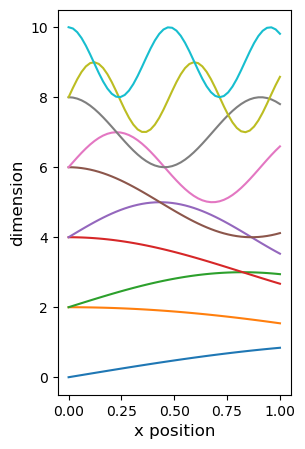

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=1,
                         figsize=(3, 5))

y = 0
for dim in range(pe.shape[1]):
    axes.plot(position_x, pe[:,dim,0] + y)
    y += 1
axes.set_ylabel("dimension",fontsize = 12)
axes.set_xlabel("x position",fontsize = 12)
#plt.plot(pe[2,:])

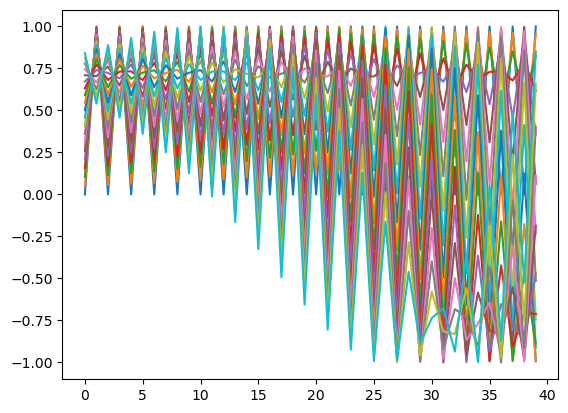

In [114]:
for dim in range(pe.shape[0]):
    plt.plot(pe[dim,:])